# Analyzing historical baseball data with the aim to identify what characteristics correlate best with becoming voted into the hall of fame

## Questions to be addressed in the analysis below:
1. What players seem to have been missed by hall of fame voters?
2. What stat categories do borderline hall of fame candidates perform best in?
3. Why might these players be excluded from the hall of fame?

In [129]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

Read csv files that are to be examined into dataframes

In [130]:
## create column name lists
hall_columns = ['playerID', 'yearID', 'votedBy', 'ballots', 'needed', 'votes', 'inducted', 'category', 'needed_note']

batting_columns = ['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 
                   'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP']

pitching_columns = ['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W', 'L', 'G', 'GS', 'CG', 'SHO', 'SV', 'IPOuts', 
                    'H Allowed', 'ER', 'HR Allowed', 'BB Allowed', 'K', 'BAOpp', 'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 
                    'GF', 'R Allowed', 'SH', 'SF', 'GIDP Induced']

## read in wanted .csv files
home_path = 'c:/users/moore/documents/udacity/Project 2 - Analyzing Baseball Data/lahman-csv_2015-01-24/'
work_path = 'c:/users/tmoore/desktop/csv/Project 2 - Analyzing Baseball Data/lahman-csv_2015-01-24/'

path = home_path

hall_of_fame = pd.read_csv(path + 'HallOfFame.csv', header=0, low_memory=False)

batting_regular_season = pd.read_csv(path + 'Batting.csv', header=0, low_memory=False)

pitching_regular_season = pd.read_csv(path + 'Pitching.csv', skiprows=1,names=pitching_columns,
                                      low_memory=False)

Replace all NaN values with zeros to simplify numerical analysis

In [131]:
hall_of_fame.fillna(value=0, inplace=True)
batting_regular_season.fillna(value=0, inplace=True)
pitching_regular_season.fillna(value=0, inplace=True)

Here I have isolated all players who have been accepted into the hall of fame as players, not as managers or front office members. I have dropped any duplicate playerID's, that existed due to not being introduced on their first ballot. 

In [132]:
## Isolate players in hall of fame
inducted_in_hall = hall_of_fame[hall_of_fame.inducted == 'Y']
players_in_hall = inducted_in_hall[inducted_in_hall.category == 'Player']
players_in_hall = players_in_hall.drop_duplicates(keep='first')

## hall of fame playerID's
hall_player_id = players_in_hall.playerID.to_frame()

All batters have been isolated into a single dataframe containing only playerID's 

In [133]:
## Isolate playerID's for all batting statistics, no duplicates
batter_player_ID = batting_regular_season.playerID
batter_player_ID = batter_player_ID.drop_duplicates(keep='first').to_frame()

The above methods have been utilized to isolate all pitcher playerID's. A master playerID dataframe was then built removing duplicates. Pitchers in the NL hit as well as pitch so it was necessary to remove duplicates at this phase as well

In [134]:
## Isolate playerID's for all pitching statistics, no duplicates
pitcher_player_ID = pitching_regular_season.playerID
pitcher_player_ID = pitcher_player_ID.drop_duplicates(keep='first').to_frame()

## create a master player ID dataframe covering pitchers and hitters, no duplicates
player_ID = batter_player_ID.append(pitcher_player_ID)
player_ID = player_ID.drop_duplicates()

Merging the playerID dataframes built above with player stat dataframes. 4 final dataframes were built:
1. Hall of fame batters
2. All batters
3. Hall of fame pitchers
4. All pitchers

In [135]:
## create a player card for hall of fame batters
hall_player_card = pd.DataFrame({})
stats = ['playerID','yearID','lgID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 
         'HBP', 'SF']
hall_batting_stats = batting_regular_season[stats]
hall_player_card = hall_player_id.merge(hall_batting_stats, how='inner', on='playerID')
hall_player_card = hall_player_card.drop_duplicates(subset = ['G', 'AB', 'R', 'H', '2B', '3B', 
                                                              'HR', 'RBI', 'SB', 'BB', 'HBP', 
                                                              'SF'], 
                                                    keep=False)

## create a player card for all batters
all_batter_player_card = pd.DataFrame({})
all_batter_player_card = batter_player_ID.merge(batting_regular_season, how='inner', on='playerID')
all_batter_player_card = all_batter_player_card.drop_duplicates(subset=['G', 'AB', 'R', 'H', 
                                                                        '2B', '3B', 'HR', 'RBI', 
                                                                        'SB', 'BB', 'HBP', 'SF'],
                                                                keep=False)

## create a player card for hall of fame pitchers
hall_pitcher_card = pd.DataFrame({})
pitching_stats = ['playerID','yearID','lgID', 'W', 'L', 'G', 'GS', 'CG', 'SHO', 'SV', 'H Allowed', 
                  'ER', 'HR Allowed', 'BB Allowed', 'K', 'BAOpp','ERA', 'IBB', 'IPOuts']
all_pitching_stats = pitching_regular_season[pitching_stats]
hall_pitcher_card = hall_player_id.merge(all_pitching_stats, how='inner', on='playerID')
hall_pitcher_card = hall_pitcher_card.drop_duplicates(subset=['W', 'L', 'G', 'GS', 'CG', 'SHO', 
                                                              'SV', 'H Allowed', 'ER', 
                                                              'HR Allowed', 'BB Allowed', 'K', 
                                                              'BAOpp', 'ERA', 'IBB', 'IPOuts'], 
                                                      keep=False)

## create a player card for all pitchers
all_pitcher_player_card = pd.DataFrame({})
all_pitcher_player_card = pitcher_player_ID.merge(all_pitching_stats, how='inner', on='playerID')
all_pitcher_player_card = all_pitcher_player_card.drop_duplicates(subset=['W', 'L', 'G', 'GS', 
                                                                          'CG', 'SHO', 'SV', 
                                                                          'H Allowed', 'ER', 
                                                                          'HR Allowed', 
                                                                          'BB Allowed', 
                                                                          'K', 'BAOpp', 'ERA', 
                                                                          'IBB', 'IPOuts'], 
                                                                  keep=False)

In [136]:
## build a function to take a dataframe as an input and return a list of playerID's
def list_creator(df):
    export_list = []
    for item in df.playerID:
        export_list.append(item)
    return(export_list)

In [137]:
## create a python list of all hall playerID's
hall_list = list_creator(hall_player_id)

## create a python list of all playerID's
batter_list = list_creator(batter_player_ID)

## Data Wrangling continued:
- Build a function taking a dataframe and a player list as arguments and returns a dictionary of player : player dataframe

In [138]:
## create a dictionary of dataframes for each player
def player_separator(df, player_list):
    player_dictionary = {}
    for player in player_list:
        player_data = df[df.playerID == player]
        player_dictionary[player] = player_data
    return player_dictionary

In [139]:
## build a dictionary of all hall of fame players
hall_player_dictionary = player_separator(hall_player_card, hall_list)

## build a dictionary of all batters
all_batter_dictionary = player_separator(all_batter_player_card, batter_list)

- Build a function taking a dictionary and a player list as arguments, and returns career stats rather than yearly stats

In [140]:
## Build a single dataframe containing all players career counting stats
def career_counting_stat_calculator(dictionary, player_list):
    player_dictionary = {}
    for player in player_list:
        player_info = [player]
        player_stats = dictionary[player]
        player_info.append(player_stats['yearID'].min())
        player_info.append(player_stats['yearID'].max())
        player_info.append(player_stats['G'].sum())
        player_info.append(player_stats['AB'].sum())
        player_info.append(player_stats['R'].sum())
        player_info.append(player_stats['H'].sum())
        player_info.append(player_stats['2B'].sum())
        player_info.append(player_stats['3B'].sum())
        player_info.append(player_stats['HR'].sum())
        player_info.append(player_stats['RBI'].sum())
        player_info.append(player_stats['SB'].sum())
        player_info.append(player_stats['BB'].sum())
        player_info.append(player_stats['HBP'].sum())
        player_info.append(player_stats['SF'].sum())
        player_dictionary[player] = player_info
    df = pd.DataFrame.from_dict(player_dictionary, orient='index')
    df.columns = ['playerID', 'start_year', 'end_year', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR',
                 'RBI', 'SB', 'BB', 'HBP', 'SF']
    return df

In [141]:
## Build a dataframe of all hall of fame players career counting stats
hall_player_career_stats = career_counting_stat_calculator(hall_player_dictionary, hall_list)

## Build a dataframe of all batters career counting stats
all_batter_career_stats = career_counting_stat_calculator(all_batter_dictionary, batter_list)

Building functions to compute rate stats for batters

In [142]:
## calculate rate stats from Dataframe
def batting_average_calculator(df):
    H = float(df.loc['H'])
    AB = float(df.loc['AB'])
    if AB == 0:
        BA = 0.00
        
    else:
        BA = round(H / AB, 4)
    return BA

def on_base_percentage_calculator(df):
    H = float(df.loc['H'])
    AB = float(df.loc['AB'])
    BB = float(df.loc['BB'])
    HBP = float(df.loc['HBP'])
    SF = float(df.loc['SF'])
    if AB == 0:
        OBP = 0.00
    else:
        OBP = round((H + BB + HBP) / (AB + BB + HBP + SF), 4)    
    return OBP

def slugging_percentage_calculator(df):
    H = float(df.loc['H'])
    AB = float(df.loc['AB'])
    HR = float(df.loc['HR'])
    B3 = float(df.loc['3B'])
    B2 = float(df.loc['2B'])
    if AB == 0:
        SLG = 0.00
    else:
        SLG = round(((HR * 4) + (B3 * 3) + (B2 * 2) + (H - B2 - B3 - HR)) / AB, 4)
    return SLG

### Testing out my rate stat calculators above on Hank Aaron. 
- These results have been double-checked against Baseball-Reference.com to ensure my functions are returning accurate information.

In [143]:
## Testing on Hank Aaron
hank_aaron = hall_player_card[hall_player_card.playerID == 'aaronha01']

hank_aaron_ba = hank_aaron.apply(batting_average_calculator, axis=1)
hank_aaron_obp = hank_aaron.apply(on_base_percentage_calculator, axis=1)
hank_aaron_slg = hank_aaron.apply(slugging_percentage_calculator, axis=1)
hank_aaron_years = hank_aaron.yearID

hank_aaron_rate_stats = pd.concat([hank_aaron_ba, hank_aaron_obp, hank_aaron_slg, hank_aaron_years], axis=1)
hank_aaron_rate_stats.columns = ['BA', 'OBP', 'SLG', 'yearID']
hank_aaron = hank_aaron.merge(hank_aaron_rate_stats, how='outer', on='yearID')
hank_aaron.head()

,playerID,yearID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,BB,HBP,SF,BA,OBP,SLG
0,aaronha01,1954,NL,122,468,58,131,27,6,13,69,2,28,3,4,0.2799,0.3221,0.4466
1,aaronha01,1955,NL,153,602,105,189,37,9,27,106,3,49,3,4,0.3140,0.3663,0.5399
2,aaronha01,1956,NL,153,609,106,200,34,14,26,92,2,37,2,7,0.3284,0.3649,0.5583
3,aaronha01,1957,NL,151,615,118,198,27,6,44,132,1,57,0,3,0.3220,0.3778,0.6000
4,aaronha01,1958,NL,153,601,109,196,34,4,30,95,4,59,1,3,0.3261,0.3855,0.5458


- Building a function to apply rate stat calculators to a given dataframe

In [144]:
## function taking a dataframe as an input and returning a new dataframe with rate stat columns
def career_rate_stat_calculator(df):
    ba = df.apply(batting_average_calculator, axis=1)
    obp = df.apply(on_base_percentage_calculator, axis=1)
    slg = df.apply(slugging_percentage_calculator, axis=1)
    ops = obp + slg
    p_id= df.playerID
    rate_stats = pd.concat([ba, obp, slg, ops, p_id], axis=1)
    rate_stats.columns = ['BA', 'OBP', 'SLG', 'OPS', 'playerID']
    df = df.merge(rate_stats, how='outer', on='playerID')
    return df

In [145]:
## apply career_rate_stat_calculator to hall of fame players
hall_player_career_rate_and_counting_stats = career_rate_stat_calculator(hall_player_career_stats)

# Exploration phase 

- The hall of fame requires players to have played 10+ years to qualify as a candidate. I will begin my analysis covering players with 2500+ AB - approximately 5 full time years starting. By limiting my analysis to a smaller field of relavant players I am able to focus upon borderline candidates the hall of fame may have missed with their voting.

In [214]:
## separate out modern hall of fame players (more than 2500 AB and started career 1901+)
modern_hall_players = hall_player_career_rate_and_counting_stats[
    hall_player_career_rate_and_counting_stats.AB >= 2500]
modern_hall_players = modern_hall_players[modern_hall_players.start_year > 1900]
modern_hall_players = modern_hall_players[(modern_hall_players.end_year - 
                                          modern_hall_players.start_year)>=9]
modern_hall_players.set_index('playerID', inplace=True, drop=False)
modern_hall_list = list_creator(modern_hall_players)
modern_hall_player_list = pd.DataFrame({'playerID': modern_hall_list, 'Hall?' : 'Hall'})
modern_hall_player_list.set_index('playerID', inplace=True)


In [147]:
## apply career_rate_stat_calculator to all batters
all_batter_career_rate_and_counting_stats = career_rate_stat_calculator(all_batter_career_stats)

In [215]:
## separate out modern players that meet similar hall of fame criteria to above
## (more than 2500 AB and started career 1901+)
all_modern_batters = all_batter_career_rate_and_counting_stats[
    all_batter_career_rate_and_counting_stats.AB >= 2500]
all_modern_batters = all_modern_batters[all_modern_batters.start_year > 1900]
all_modern_batters = all_modern_batters[(all_modern_batters.end_year - 
                                        all_modern_batters.start_year)>=9]
all_modern_batters.set_index('playerID', inplace=True, drop=False)

### The shape of the data is made more obvious via the use of histograms and boxplots. 
- In the histograms below the data has been divided into 10 equal sized bins ((max hits - min hits) / 10 )
    - This enables us to see a more or less bell shaped curve for hits amongst hall of fame players, while we observe career hits for all players to be skewed right. 
- In the first set of box plots, I have divided the data into 10 bins divided equally amongst all qualifying players. 
    - If we were to exclude the top and bottom box plots for both categories of players, we can see a linear distribution of career hits with a difference in the vertical intercept (~1200 for hall of fame players, ~700 for all players)
    
    

In [149]:
df = pd.DataFrame({u'Hall of Fame Career Hits': modern_hall_players.H})
df[u'deciles'] = pd.qcut(df[u'Hall of Fame Career Hits'], 10, labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                                          u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                                         u'80-90%', u'90-100%'])

df2 = pd.DataFrame({u'All Player Career Hits': all_modern_batters.H})
df2[u'deciles'] = pd.qcut(df2[u'All Player Career Hits'], 10, labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                                          u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                                         u'80-90%', u'90-100%'])

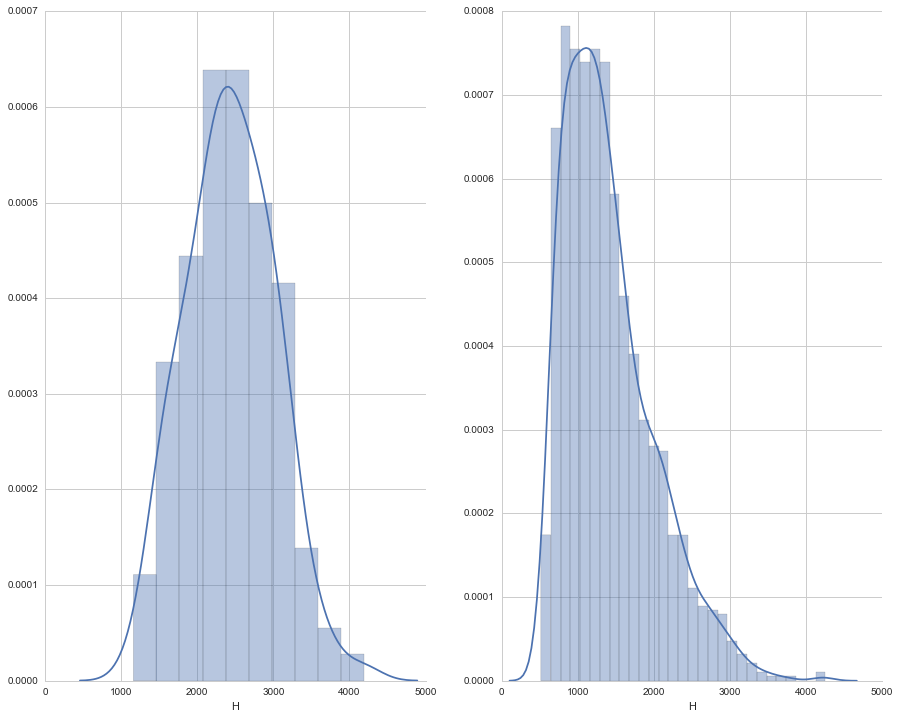

In [150]:
fig, axs = plt.subplots(1,2, figsize=(15,12))
sns.set_context('notebook')
sns.set_style('white')
sns.despine()
hall_h = sns.distplot(modern_hall_players.H, ax=axs[0])
all_h = sns.distplot(all_modern_batters.H, ax=axs[1])


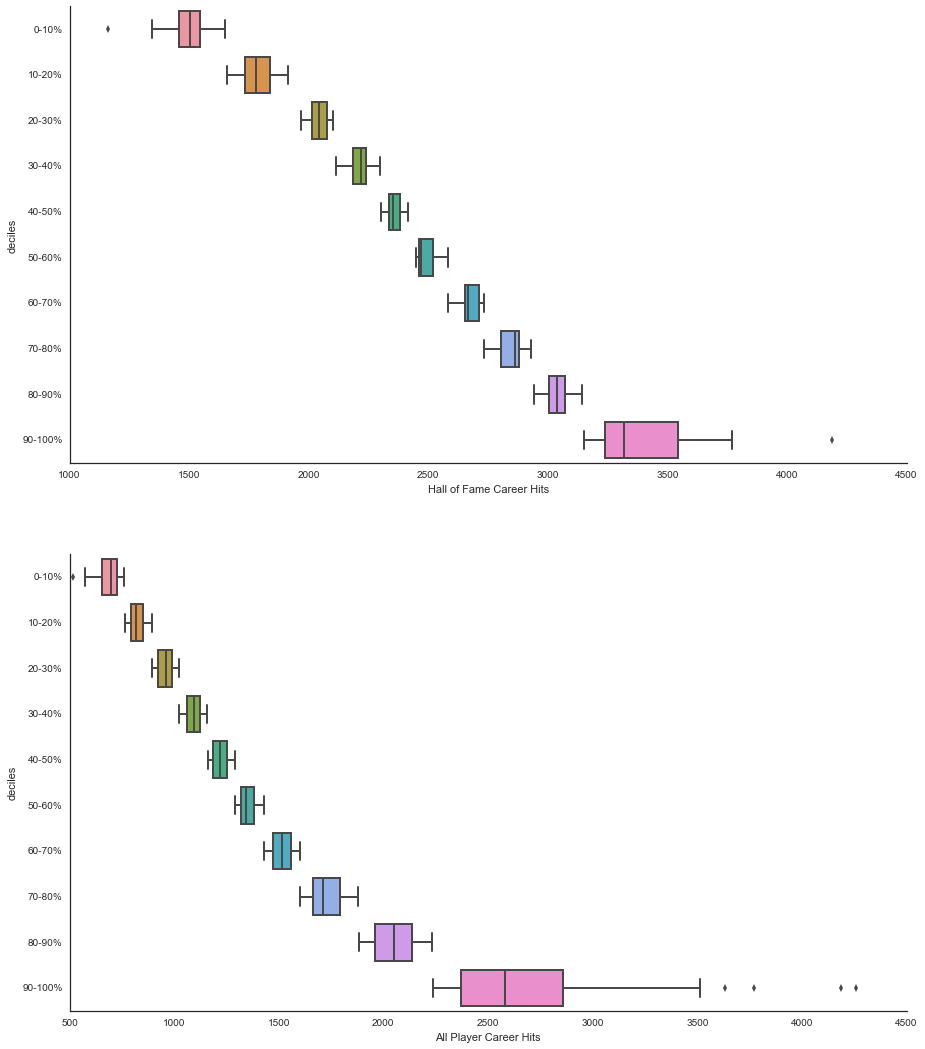

In [151]:
fig, axs = plt.subplots(2,1, figsize=(15,18))
sns.set_context(font_scale = 6, rc={'lines.linewidth': 2})
sns.set_style('whitegrid')
sns.despine()
sns.boxplot(y='deciles', x='Hall of Fame Career Hits', data = df, ax = axs[0])
sns.boxplot(y='deciles', x='All Player Career Hits', data=df2, ax=axs[1])

In [152]:
## a function to return players missing from the hall of fame

def missing_hall_candidates(hall_player_list, missing_player_list):
    missed_hall_players = []
    for player in missing_player_list:
        if player not in hall_player_list:
            missed_hall_players.append(player)
    return missed_hall_players

In [153]:
## A function to build a dataframe of career stats containing only the players included in 
## 'missing_player_list' using data from dataframe df

def missing_hall_dataframe(missing_player_list, df):
    dictionary = {}
    for player in missing_player_list:
        player_info = [player]
        player_stats = df[df.playerID == player]
        player_info.append(player_stats.iloc[0]['start_year'])
        player_info.append(player_stats.iloc[0]['end_year'])
        player_info.append(player_stats.iloc[0]['G'])
        player_info.append(player_stats.iloc[0]['AB'])
        player_info.append(player_stats.iloc[0]['R'])
        player_info.append(player_stats.iloc[0]['H'])
        player_info.append(player_stats.iloc[0]['2B'])
        player_info.append(player_stats.iloc[0]['3B'])
        player_info.append(player_stats.iloc[0]['HR'])
        player_info.append(player_stats.iloc[0]['RBI'])
        player_info.append(player_stats.iloc[0]['SB'])
        player_info.append(player_stats.iloc[0]['BB'])
        player_info.append(player_stats.iloc[0]['HBP'])
        player_info.append(player_stats.iloc[0]['SF'])
        player_info.append(player_stats.iloc[0]['BA'])
        player_info.append(player_stats.iloc[0]['OBP'])
        
        player_info.append(player_stats.iloc[0]['SLG'])
        player_info.append(player_stats.iloc[0]['OPS'])
        dictionary[player] = player_info
    df2 = pd.DataFrame.from_dict(dictionary, orient='index')
    df2.columns = ['playerID', 'start_year', 'end_year', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 
                   'RBI', 'SB', 'BB', 'HBP', 'SF', 'BA', 'OBP', 'SLG', 'OPS']
    return df2

In [154]:
df3 = pd.DataFrame({u'Hall of Fame Career HR\'s': modern_hall_players.HR})
df3[u'deciles'] = pd.qcut(df3[u'Hall of Fame Career HR\'s'], 10, labels = [u'0-10%', u'10-20%', 
                                                                           u'20-30%', u'30-40%', 
                                                                           u'40-50%', u'50-60%', 
                                                                           u'60-70%', u'70-80%', 
                                                                           u'80-90%', u'90-100%'])

df4 = pd.DataFrame({u'All Player Career HR\'s': all_modern_batters.HR})
df4[u'deciles'] = pd.qcut(df4[u'All Player Career HR\'s'], 10, labels = [u'0-10%', u'10-20%', 
                                                                         u'20-30%', u'30-40%', 
                                                                         u'40-50%', u'50-60%', 
                                                                         u'60-70%', u'70-80%', 
                                                                         u'80-90%', u'90-100%'])


## Here figure out how to splice together the two df above to enable a 'nested' boxplot to be drawn in a single plot. 

## This will make it more obvious the difference between the deciles of your data

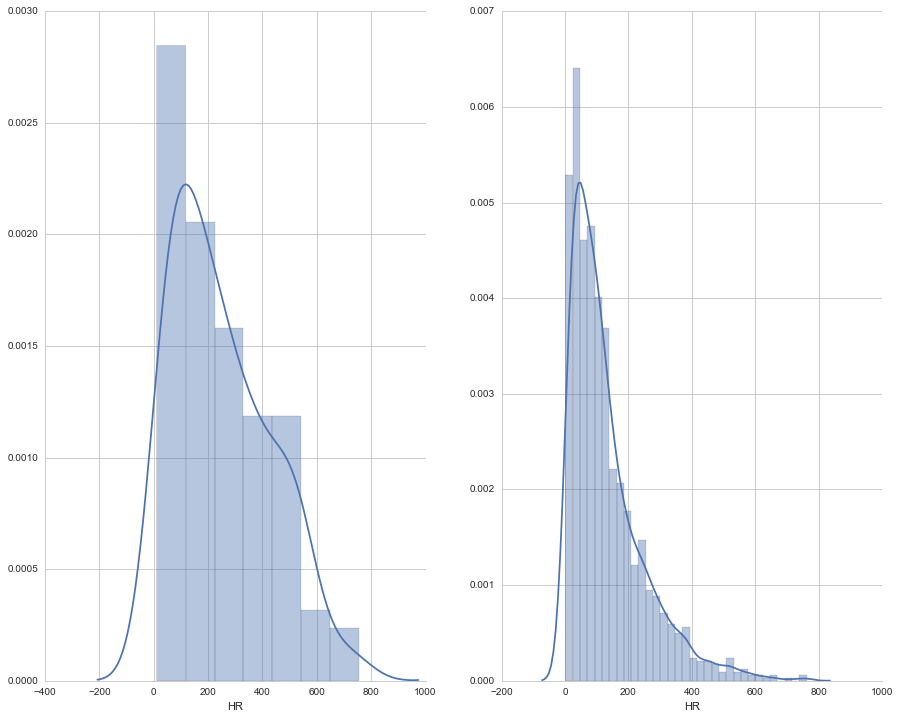

In [155]:
fig, axs = plt.subplots(1,2, figsize=(15,12))
sns.set_context('notebook')
sns.set_style('white')
sns.despine()

sns.distplot(modern_hall_players.HR, ax=axs[0])
sns.distplot(all_modern_batters.HR, ax=axs[1])

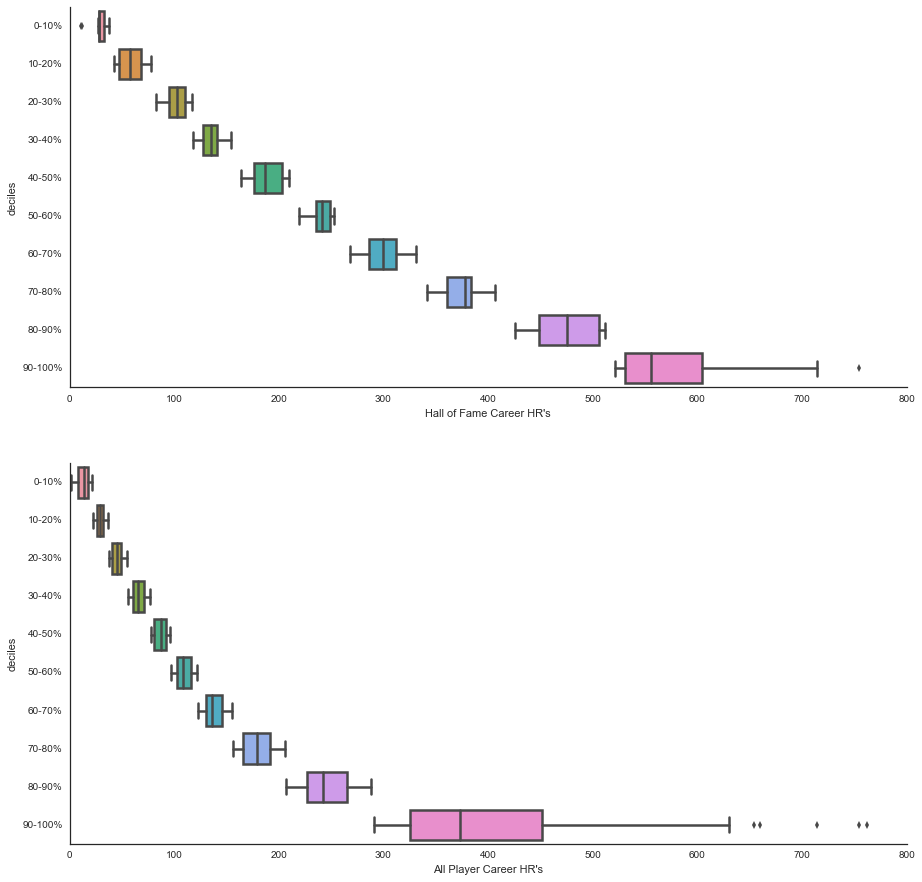

In [156]:
fig, axs = plt.subplots(2,1, figsize=(15,15))
sns.set_context(font_scale = 6, rc={'lines.linewidth': 2.5})

sns.despine()

sns.boxplot(y='deciles', x = 'Hall of Fame Career HR\'s', data = df3, ax=axs[0])
sns.boxplot(y='deciles', x= 'All Player Career HR\'s', data = df4, ax=axs[1])
sns.set_style('whitegrid')

### Attempting to isolate hall of fame players by identifying players whose performance is a positive outlier from the general population

Since the Hall is looking for outstanding players, I am searching for players whose performance can't be confused with a typical player. 

My approach is to look at the number of stat categories in which a 'typical' Hall of Fame player is an outlier. I am repeating this approach with all players to isolate only non-Hall of Fame players that are an outlier in at least one stat category.

### Looking at the outliers for all players in these categories:
1. Hits
2. Runs
3. Doubles
4. Triples
5. Homeruns
6. Runs Batted In
7. Stolen Bases
8. Batting Average
9. On Base Percentage
10. Slugging Percentage
11. On Base + Slugging Percentage

### I am using the following methodology to identify outliers from the general population:
1. Compute Median
2. Computer Interquartile range (IQR)
3. Identify players whose performance exceeds 1.5 IQR + median to identify outliers


In [157]:
## A function that takes a dataframe of a single stat as an input, and returns the outlier limit
## of median + IQR
def outlier_limit(df):
    med = df.median()
    iqr_range = df.to_frame().quantile([.75, .25])
    iqr = iqr_range.ix[.75] - iqr_range.ix[.25]
    outlier_limit =  iqr_range.ix[.75] + (iqr[0] * 1.5)
    return outlier_limit[0]


In [158]:
## A function that takes a dataframe as an input and returns a new dataframe with stats as column
## names, playerID's of players that are an outlier in at least one category as the index 
## True will be output for each columnt this player is an outlier 

def outlier_list_creator(df):
    stats = ['H', 'R', '2B', '3B', 'HR', 'RBI', 'SB', 'BA', 'OBP', 'SLG', 'OPS']
    hits_list = list_creator(df[df.H >= outlier_limit(df.H)])
    runs_list = list_creator(df[df.R >= outlier_limit(df.R)])
    doubles_list = list_creator(df[df['2B'] >= outlier_limit(df['2B'])])
    triples_list = list_creator(df[df['3B'] >= outlier_limit(df['3B'])])
    homeruns_list = list_creator(df[df.HR >= outlier_limit(df.HR)])
    rbi_list = list_creator(df[df.RBI >= outlier_limit(df.RBI)])
    sb_list = list_creator(df[df.SB >= outlier_limit(df.SB)])
    ba_list = list_creator(df[df.BA >= outlier_limit(df.BA)])
    obp_list = list_creator(df[df.OBP >= outlier_limit(df.OBP)])
    slg_list = list_creator(df[df.SLG >= outlier_limit(df.SLG)])
    ops_list = list_creator(df[df.OPS >= outlier_limit(df.OPS)])
    
    player_list = list(set(hits_list + runs_list + doubles_list + triples_list + homeruns_list + 
                     rbi_list + sb_list + ba_list + obp_list + slg_list + ops_list))
    outlier_df = pd.DataFrame(index = player_list, columns = stats)
    outlier_df.insert(0, 'playerID', player_list)
    for player in player_list:
        if player in hits_list:
            outlier_df.H[player] = True
        else:
            outlier_df.H[player] = False
    for player in player_list:    
        if player in runs_list:
            outlier_df.R[player] = True
        else:
            outlier_df.R[player] = False
    for player in player_list:    
        if player in doubles_list:
            outlier_df['2B'][player] = True
        else:
            outlier_df['2B'][player] = False
    for player in player_list:
        if player in triples_list:
            outlier_df['3B'][player] = True
        else:
            outlier_df['3B'][player] = False
    for player in player_list:
        if player in homeruns_list:
            outlier_df.HR[player] = True
        else:
            outlier_df.HR[player] = False
    for player in player_list:
        if player in rbi_list:
            outlier_df.RBI[player] = True
        else:
            outlier_df.RBI[player] = False
    for player in player_list:
        if player in sb_list:
            outlier_df.SB[player] = True
        else:
            outlier_df.SB[player] = False
    for player in player_list:
        if player in ba_list:
            outlier_df.BA[player] = True
        else:
            outlier_df.BA[player] = False
    for player in player_list:
        if player in obp_list:
            outlier_df.OBP[player] = True
        else:
            outlier_df.OBP[player] = False
    for player in player_list:
        if player in slg_list:
            outlier_df.SLG[player] = True
        else:
            outlier_df.SLG[player] = False
    for player in player_list:
        if player in ops_list:
            outlier_df.OPS[player] = True
        else:
            outlier_df.OPS[player] = False
    return(outlier_df)


In [159]:
outlier_df = outlier_list_creator(all_modern_batters)


In [160]:
outlier_list = list_creator(outlier_df)
hall_candidate_outliers = missing_hall_candidates(hall_list, outlier_list)
hall_outliers = list(set(outlier_list) - set(hall_candidate_outliers))

In [161]:
## A function to build a dataframe of career stats containing only the players included in 
## 'missing_player_list' using data from dataframe df

def outlier_dataframe(outliers, df):
    dictionary = {}
    for player in outliers:
        player_info = []
        player_stats = df[df.playerID == player]
        player_info.append(player_stats.iloc[0]['R'])
        player_info.append(player_stats.iloc[0]['H'])
        player_info.append(player_stats.iloc[0]['2B'])
        player_info.append(player_stats.iloc[0]['3B'])
        player_info.append(player_stats.iloc[0]['HR'])
        player_info.append(player_stats.iloc[0]['RBI'])
        player_info.append(player_stats.iloc[0]['SB'])
        player_info.append(player_stats.iloc[0]['BA'])
        player_info.append(player_stats.iloc[0]['OBP'])        
        player_info.append(player_stats.iloc[0]['SLG'])
        player_info.append(player_stats.iloc[0]['OPS'])
        dictionary[player] = player_info
    df2 = pd.DataFrame.from_dict(dictionary, orient='index')
    df2.columns = ['R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BA', 'OBP', 'SLG', 'OPS']
    return df2

In [162]:
hall_df_outliers = modern_hall_players.merge(outlier_df, how='left', on='playerID')
hall_df_outliers_list = list_creator(hall_df_outliers)
hall_df_outliers.set_index('playerID', drop=True, inplace=True)
hall_df_outliers.drop(['start_year', 'end_year', 'R_x', 'H_x', '2B_x', '3B_x', 'HR_x', 'RBI_x', 
                       'SB_x', 'BA_x', 'OBP_x', 'SLG_x', 'OPS_x', 'G', 'AB', 'BB', 'HBP', 'SF'], 
                      axis=1, inplace=True)
hall_df_outliers.fillna(value=False, inplace=True)
hall_df_outliers.columns = [ 'H', 'R', '2B', '3B', 'HR', 'RBI', 'SB', 'BA', 'OBP', 'SLG', 'OPS']

### Here I have Isolated all modern hall of fame players showing the total number of categories each player is an outlier in
- For the 119 hall of fame players, the mean is 2.202 categories to be an outlier in
- For the 141 modern hall candidates I've identified due to being statistical outliers in at least one category, the mean is 1.546 outlier categories

In [163]:
hall_df_outliers_sum = hall_df_outliers.cumsum(axis=1)
total_hall_outliers = hall_df_outliers_sum.OPS
total_hall_outliers.name = 'Hall of Fame - Category Outliers - Max of 11'
total_hall_outliers.describe()

count    119.000000
mean       2.201681
std        2.381354
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max        9.000000
Name: Hall of Fame - Category Outliers - Max of 11, dtype: float64

In [164]:
hall_candidate_outlier_df = outlier_dataframe(hall_candidate_outliers, outlier_df)
hall_candidate_outlier_sum = hall_candidate_outlier_df.cumsum(axis=1)
total_hall_candidate_outliers = hall_candidate_outlier_sum.OPS
total_hall_candidate_outliers.name = 'Hall Candidate - Category Outliers - Max of 11'
total_hall_candidate_outliers.describe()

count    141.000000
mean       1.546099
std        1.155578
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        9.000000
Name: Hall Candidate - Category Outliers - Max of 11, dtype: float64

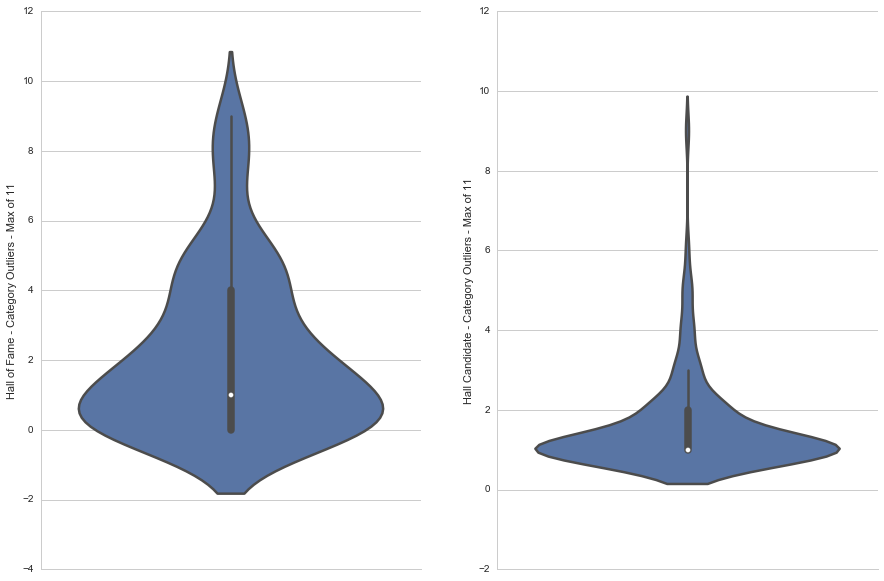

In [165]:
fig, axs = plt.subplots(1,2, figsize=(15,10))

sns.violinplot(y=total_hall_outliers, ax = axs[0])
sns.despine()

sns.violinplot(y=total_hall_candidate_outliers, ax= axs[1])
sns.despine()

In [166]:
missed_candidates = missing_hall_dataframe(hall_candidate_outliers, all_modern_batters)

### Visually evaluate hall of fame players against my missed candidates by category
- Below I have built a series of boxplots showing how similar the distributions of my candidate hall of fame candidates is to the population of hall of fame players


In [248]:
# Building comparative plots of hall vs. candidate players

runs_df = pd.DataFrame({u'Career Runs' : modern_hall_players.R,
                       u'Category' : modern_hall_player_list['Hall?']})
runs_df[u'Deciles'] = pd.qcut(runs_df[u'Career Runs'], 10, 
                                   labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
candidate_runs_df = pd.DataFrame({u'Career Runs' : missed_candidates.R})
candidate_runs_df[u'Deciles'] = pd.qcut(candidate_runs_df[u'Career Runs'], 
                                        10, labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
runs_df = runs_df.append(candidate_runs_df)
runs_df['Category'].fillna(value='Hall Candidate', inplace=True)

all_runs = pd.DataFrame({u'Career Runs' : all_modern_batters.R})
all_runs[u'Deciles'] = pd.qcut(all_runs[u'Career Runs'], 10, 
                               labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', u'40-50%', 
                                         u'50-60%', u'60-70%', u'70-80%', u'80-90%', u'90-100%'])

runs_df = runs_df.append(all_runs)
runs_df['Category'].fillna(value='All Players', inplace=True)


In [247]:
# Building comparative plots of hall vs. candidate players

hits_df = pd.DataFrame({u'Career Hits' : modern_hall_players.H,
                       u'Category' : modern_hall_player_list['Hall?']})
hits_df[u'Deciles'] = pd.qcut(hits_df[u'Career Hits'], 10, 
                                   labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
candidate_hits_df = pd.DataFrame({u'Career Hits' : missed_candidates.H})
candidate_hits_df[u'Deciles'] = pd.qcut(candidate_hits_df[u'Career Hits'], 
                                        10, labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
hits_df = hits_df.append(candidate_hits_df)
hits_df['Category'].fillna(value='Hall Candidate', inplace=True)

all_hits = pd.DataFrame({u'Career Hits' : all_modern_batters.H})
all_hits[u'Deciles'] = pd.qcut(all_hits[u'Career Hits'], 10, 
                               labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', u'40-50%', 
                                         u'50-60%', u'60-70%', u'70-80%', u'80-90%', u'90-100%'])

hits_df = hits_df.append(all_hits)
hits_df['Category'].fillna(value='All Players', inplace=True)

In [246]:
# Building comparative plots of hall vs. candidate players

doubles_df = pd.DataFrame({u'Career Doubles' : modern_hall_players['2B'],
                       u'Category' : modern_hall_player_list['Hall?']})
doubles_df[u'Deciles'] = pd.qcut(doubles_df[u'Career Doubles'], 10, 
                                   labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
candidate_doubles_df = pd.DataFrame({u'Career Doubles' : missed_candidates['2B']})
candidate_doubles_df[u'Deciles'] = pd.qcut(candidate_doubles_df[u'Career Doubles'], 
                                        10, labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
doubles_df = doubles_df.append(candidate_doubles_df)
doubles_df['Category'].fillna(value='Hall Candidate', inplace=True)

all_doubles = pd.DataFrame({u'Career Doubles' : all_modern_batters['2B']})
all_doubles[u'Deciles'] = pd.qcut(all_doubles[u'Career Doubles'], 10, 
                               labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', u'40-50%', 
                                         u'50-60%', u'60-70%', u'70-80%', u'80-90%', u'90-100%'])

doubles_df = doubles_df.append(all_doubles)
doubles_df['Category'].fillna(value='All Players', inplace=True)

In [245]:
# Building comparative plots of hall vs. candidate players

triples_df = pd.DataFrame({u'Career Triples' : modern_hall_players['3B'],
                       u'Category' : modern_hall_player_list['Hall?']})
triples_df[u'Deciles'] = pd.qcut(triples_df[u'Career Triples'], 10, 
                                   labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
candidate_triples_df = pd.DataFrame({u'Career Triples' : missed_candidates['3B']})
candidate_triples_df[u'Deciles'] = pd.qcut(candidate_triples_df[u'Career Triples'], 
                                        10, labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
triples_df = triples_df.append(candidate_triples_df)
triples_df['Category'].fillna(value='Hall Candidate', inplace=True)

all_trips = pd.DataFrame({u'Career Triples' : all_modern_batters['3B']})
all_trips[u'Deciles'] = pd.qcut(all_trips[u'Career Triples'], 10, 
                               labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', u'40-50%', 
                                         u'50-60%', u'60-70%', u'70-80%', u'80-90%', u'90-100%'])

triples_df = triples_df.append(all_trips)
triples_df['Category'].fillna(value='All Players', inplace=True)

In [244]:
# Building comparative plots of hall vs. candidate players

hrs_df = pd.DataFrame({u'Career Homeruns' : modern_hall_players['HR'],
                       u'Category' : modern_hall_player_list['Hall?']})
hrs_df[u'Deciles'] = pd.qcut(hrs_df[u'Career Homeruns'], 10, 
                                   labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
candidate_hrs_df = pd.DataFrame({u'Career Homeruns' : missed_candidates['HR']})
candidate_hrs_df[u'Deciles'] = pd.qcut(candidate_hrs_df[u'Career Homeruns'], 
                                        10, labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
hrs_df = hrs_df.append(candidate_hrs_df)
hrs_df['Category'].fillna(value='Hall Candidate', inplace=True)

all_hrs = pd.DataFrame({u'Career Homeruns' : all_modern_batters.HR})
all_hrs[u'Deciles'] = pd.qcut(all_hrs[u'Career Homeruns'], 10, 
                               labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', u'40-50%', 
                                         u'50-60%', u'60-70%', u'70-80%', u'80-90%', u'90-100%'])

hrs_df = hrs_df.append(all_hrs)
hrs_df['Category'].fillna(value='All Players', inplace=True)

In [243]:
# Building comparative plots of hall vs. candidate players

rbis_df = pd.DataFrame({u'Career RBI\'s' : modern_hall_players['RBI'],
                       u'Category' : modern_hall_player_list['Hall?']})
rbis_df[u'Deciles'] = pd.qcut(rbis_df[u'Career RBI\'s'], 10, 
                                   labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
candidate_rbis_df = pd.DataFrame({u'Career RBI\'s' : missed_candidates['RBI']})
candidate_rbis_df[u'Deciles'] = pd.qcut(candidate_rbis_df[u'Career RBI\'s'], 
                                        10, labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
rbis_df = rbis_df.append(candidate_rbis_df)
rbis_df['Category'].fillna(value='Hall Candidate', inplace=True)

all_rbis = pd.DataFrame({u'Career RBI\'s' : all_modern_batters.RBI})
all_rbis[u'Deciles'] = pd.qcut(all_rbis[u'Career RBI\'s'], 10, 
                               labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', u'40-50%', 
                                         u'50-60%', u'60-70%', u'70-80%', u'80-90%', u'90-100%'])

rbis_df = rbis_df.append(all_rbis)
rbis_df['Category'].fillna(value='All Players', inplace=True)

In [242]:
# Building comparative plots of hall vs. candidate players

sbs_df = pd.DataFrame({u'Career Stolen Bases' : modern_hall_players['SB'],
                       u'Category' : modern_hall_player_list['Hall?']})
sbs_df[u'Deciles'] = pd.qcut(sbs_df[u'Career Stolen Bases'], 10, 
                                   labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
candidate_sbs_df = pd.DataFrame({u'Career Stolen Bases' : missed_candidates['SB']})
candidate_sbs_df[u'Deciles'] = pd.qcut(candidate_sbs_df[u'Career Stolen Bases'], 
                                        10, labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
sbs_df = sbs_df.append(candidate_sbs_df)
sbs_df['Category'].fillna(value='Hall Candidate', inplace=True)

all_sbs = pd.DataFrame({u'Career Stolen Bases' : all_modern_batters.SB})
all_sbs[u'Deciles'] = pd.qcut(all_sbs[u'Career Stolen Bases'], 10, 
                               labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', u'40-50%', 
                                         u'50-60%', u'60-70%', u'70-80%', u'80-90%', u'90-100%'])

sbs_df = sbs_df.append(all_sbs)
sbs_df['Category'].fillna(value='All Players', inplace=True)

In [241]:
# Building comparative plots of hall vs. candidate players

ba_df = pd.DataFrame({u'Career Batting Average' : modern_hall_players['BA'],
                       u'Category' : modern_hall_player_list['Hall?']})
ba_df[u'Deciles'] = pd.qcut(ba_df[u'Career Batting Average'], 10, 
                                   labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
candidate_ba_df = pd.DataFrame({u'Career Batting Average' : missed_candidates['BA']})
candidate_ba_df[u'Deciles'] = pd.qcut(candidate_ba_df[u'Career Batting Average'], 
                                        10, labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
ba_df = ba_df.append(candidate_ba_df)
ba_df['Category'].fillna(value='Hall Candidate', inplace=True)

all_ba = pd.DataFrame({u'Career Batting Average' : all_modern_batters.BA})
all_ba[u'Deciles'] = pd.qcut(all_ba[u'Career Batting Average'], 10, 
                               labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', u'40-50%', 
                                         u'50-60%', u'60-70%', u'70-80%', u'80-90%', u'90-100%'])

ba_df = ba_df.append(all_ba)
ba_df['Category'].fillna(value='All Players', inplace=True)

In [240]:
# Building comparative plots of hall vs. candidate players

obp_df = pd.DataFrame({u'Career On Base Percentage' : modern_hall_players['OBP'],
                       u'Category' : modern_hall_player_list['Hall?']})
obp_df[u'Deciles'] = pd.qcut(obp_df[u'Career On Base Percentage'], 10, 
                                   labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
candidate_obp_df = pd.DataFrame({u'Career On Base Percentage' : missed_candidates['OBP']})
candidate_obp_df[u'Deciles'] = pd.qcut(candidate_obp_df[u'Career On Base Percentage'], 
                                        10, labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
obp_df = obp_df.append(candidate_obp_df)
obp_df['Category'].fillna(value='Hall Candidate', inplace=True)

all_obp = pd.DataFrame({u'Career On Base Percentage' : all_modern_batters.OBP})
all_obp[u'Deciles'] = pd.qcut(all_obp[u'Career On Base Percentage'], 10, 
                               labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', u'40-50%', 
                                         u'50-60%', u'60-70%', u'70-80%', u'80-90%', u'90-100%'])

obp_df = obp_df.append(all_obp)
obp_df['Category'].fillna(value='All Players', inplace=True)

In [239]:
# Building comparative plots of hall vs. candidate players

slg_df = pd.DataFrame({u'Career Slugging Percentage' : modern_hall_players['SLG'],
                       u'Category' : modern_hall_player_list['Hall?']})
slg_df[u'Deciles'] = pd.qcut(slg_df[u'Career Slugging Percentage'], 10, 
                                   labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
candidate_slg_df = pd.DataFrame({u'Career Slugging Percentage' : missed_candidates['SLG']})
candidate_slg_df[u'Deciles'] = pd.qcut(candidate_slg_df[u'Career Slugging Percentage'], 
                                        10, labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
slg_df = slg_df.append(candidate_slg_df)
slg_df['Category'].fillna(value='Hall Candidate', inplace=True)

all_slg = pd.DataFrame({u'Career Slugging Percentage' : all_modern_batters.SLG})
all_slg[u'Deciles'] = pd.qcut(all_slg[u'Career Slugging Percentage'], 10, 
                               labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', u'40-50%', 
                                         u'50-60%', u'60-70%', u'70-80%', u'80-90%', u'90-100%'])

slg_df = slg_df.append(all_slg)
slg_df['Category'].fillna(value='All Players', inplace=True)

In [238]:
# Building comparative plots of hall vs. candidate players

ops_df = pd.DataFrame({u'Career On Base + Slugging Percentage' : modern_hall_players['OPS'],
                       u'Category' : modern_hall_player_list['Hall?']})
ops_df[u'Deciles'] = pd.qcut(ops_df[u'Career On Base + Slugging Percentage'], 10, 
                                   labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
candidate_ops_df = pd.DataFrame({u'Career On Base + Slugging Percentage' : missed_candidates['OPS']})
candidate_ops_df[u'Deciles'] = pd.qcut(candidate_ops_df[u'Career On Base + Slugging Percentage'], 
                                        10, labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', 
                                                      u'40-50%', u'50-60%', u'60-70%', u'70-80%', 
                                                      u'80-90%', u'90-100%'])
ops_df = ops_df.append(candidate_ops_df)
ops_df['Category'].fillna(value='Hall Candidate', inplace=True)

all_ops = pd.DataFrame({u'Career On Base + Slugging Percentage' : all_modern_batters.OPS})
all_ops[u'Deciles'] = pd.qcut(all_ops[u'Career On Base + Slugging Percentage'], 10, 
                               labels = [u'0-10%', u'10-20%', u'20-30%', u'30-40%', u'40-50%', 
                                         u'50-60%', u'60-70%', u'70-80%', u'80-90%', u'90-100%'])

ops_df = ops_df.append(all_ops)
ops_df['Category'].fillna(value='All Players', inplace=True)

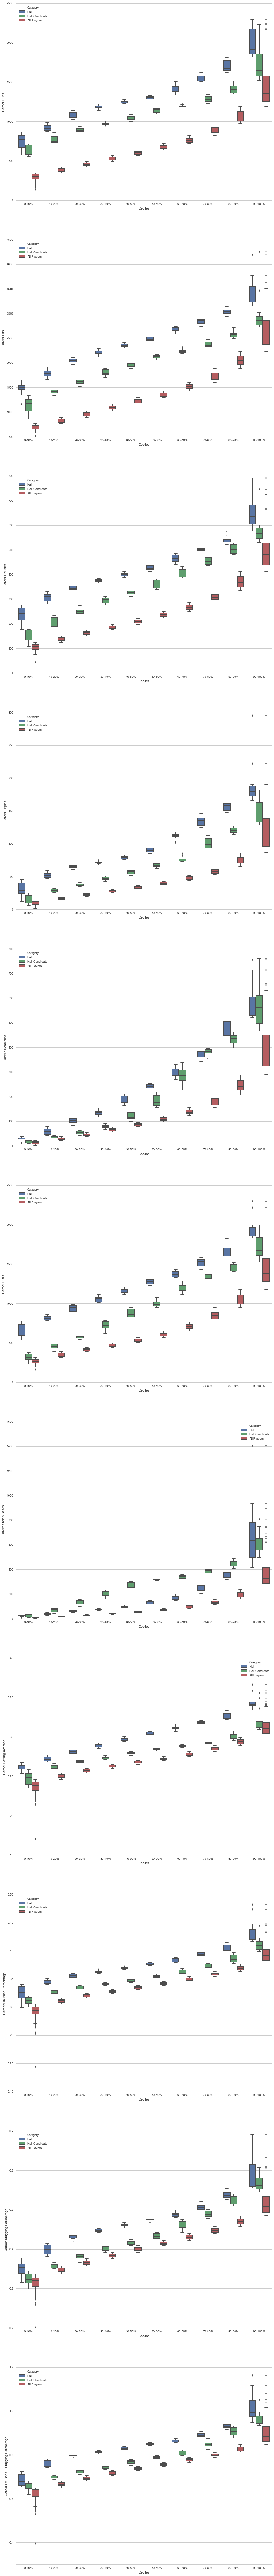

In [252]:
fig, axs = plt.subplots(11,1, figsize=(15,150))
sns.set_context(font_scale = 6, rc={'lines.linewidth': 2})


sns.boxplot(x='Deciles', y='Career Runs', hue='Category', data=runs_df, ax = axs[0])
sns.boxplot(x='Deciles', y='Career Hits', hue='Category', data=hits_df, ax = axs[1])
sns.boxplot(x='Deciles', y='Career Doubles', hue='Category', data=doubles_df, ax = axs[2])
sns.boxplot(x='Deciles', y='Career Triples', hue='Category', data=triples_df, ax = axs[3])
sns.boxplot(x='Deciles', y='Career Homeruns', hue='Category', data=hrs_df, ax = axs[4])
sns.boxplot(x='Deciles', y='Career RBI\'s', hue='Category', data=rbis_df, ax = axs[5])
sns.boxplot(x='Deciles', y='Career Stolen Bases', hue='Category', data=sbs_df, ax = axs[6])
sns.boxplot(x='Deciles', y='Career Batting Average', hue='Category', data=ba_df, ax = axs[7])
sns.boxplot(x='Deciles', y='Career On Base Percentage', hue='Category', data=obp_df, ax = axs[8])
sns.boxplot(x='Deciles', y='Career Slugging Percentage', hue='Category', data=slg_df, ax = axs[9])
sns.boxplot(x='Deciles', y='Career On Base + Slugging Percentage', hue='Category', data=ops_df,  ax = axs[10])



### Analysis
In the box plots above, we are able to see the players I have identified as potential hall candidates through outlier analysis allign more closely with hall of fame players than the general population of all hall qualifying players. This trend holds with for all categories with the exception of Batting average. 

The players I have identified for the hall even seem to outperform hall players for Stolen bases, while performing similarly for the top 4 deciles for Homeruns as well as Slugging percentage. This alligns with a belief that hall of fame voters are discriminating against modern players who may or may not have used steroids since use seemed to correlate mostly with increased power.

In [254]:
## Final dataframe of players that statistically were missed by hall of fame voters. 

missed_candidates

,playerID,start_year,end_year,G,AB,R,H,2B,3B,HR,RBI,SB,BB,HBP,SF,BA,OBP,SLG,OPS
abreubo01,abreubo01,1996,2014,2425,8480,1453,2470,574,59,288,1363,400,1476,33,85,0.2913,0.3950,0.4748,0.8698
wilsowi02,wilsowi02,1976,1994,2154,7731,1169,2207,281,147,41,585,668,425,62,35,0.2855,0.3264,0.3758,0.7022
crawfca02,crawfca02,2002,2014,1617,6393,971,1868,298,120,132,744,470,363,46,47,0.2922,0.3325,0.4383,0.7708
vizquom01,vizquom01,1989,2012,2968,10586,1445,2877,456,77,80,951,404,1028,49,94,0.2718,0.3363,0.3521,0.6884
anderga01,anderga01,1994,2010,2228,8640,1084,2529,522,36,287,1365,80,429,8,87,0.2927,0.3237,0.4611,0.7848
beschbo01,beschbo01,1908,1918,1228,4536,749,1171,190,74,28,345,428,619,48,0,0.2582,0.3533,0.3512,0.7045
colemvi01,colemvi01,1985,1997,1371,5406,849,1425,176,89,28,346,752,477,15,24,0.2636,0.3237,0.3446,0.6683
rolliji01,rolliji01,2000,2014,2090,8628,1325,2306,479,111,216,887,453,753,38,51,0.2673,0.3270,0.4236,0.7506
prattde01,prattde01,1912,1924,1836,6826,856,1996,392,117,43,970,247,513,37,0,0.2924,0.3452,0.4030,0.7482
deshide01,deshide01,1990,2002,1615,5779,872,1548,244,74,80,561,463,754,20,42,0.2679,0.3521,0.3772,0.7293
